Andrew Roda
CSCI 580
Assignment 4
11/12/2024

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Perceptron Class

In [115]:
class Perceptron:
    def __init__(self, inputs, lr, epochs):
        self.w= np.random.randn(inputs) * 1 #random weights
        self.bias = np.random.randn() * 0.1 #random bias
        self.lr = lr 
        self.epochs = epochs 
        self.errors = np.array([])
        # array to hold weights and biases for line separators. 
        self.w_sep = np.empty((0,2))
        self.bias_sep = np.empty(0)

    def predict(self, x): #step function
        predictions = np.dot(x,self.w) #array of predictions using dot product of w and x (inputs)
        predictions = predictions + self.bias; 
        for i in range(len(predictions)):
            if predictions[i] >= 0:
                predictions[i] = 1
            else: 
                predictions[i] = 0
        return predictions

    def gradientDescent(self, x, y):
        self.w_sep = np.append(self.w_sep, self.w.reshape(1,2),axis=0); #add initial weights and bias to array
        self.bias_sep = np.append(self.bias_sep, self.bias)
        for epoch in range(self.epochs):
            pred = self.predict(x) #get predictions from inputs
            for i in range(len(pred)): #calculate and update
                error = y[i] - pred[i]
                self.w =  self.w + self.lr * error * x[i]
                self.bias = self.bias + self.lr * error
                predictions = np.clip(pred, 1e-15, 1 - 1e-15)
            self.w_sep = np.append(self.w_sep, self.w.reshape(1,2),axis=0); #add new weights and bias to array
            self.bias_sep = np.append(self.bias_sep, self.bias)
            #calculate log_loss
            log_loss = (-1/len(y))*sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
            self.errors = np.append(self.errors,log_loss)
            # every 10 epochs plot log loss
            if epoch % 10 == 0:
                self.plotLogLoss() 
                plt.show()
                print(f"Epoch: {epoch}, Error: {log_loss}")
                #self.plotLogLoss()    
        self.plot_separator(x, y)
        self.plotLogLoss() 
        
    def heuristic(self, x, y):
        self.w_sep = np.append(self.w_sep, self.w.reshape(1,2),axis=0); #add initial weights and bias to array
        self.bias_sep = np.append(self.bias_sep, self.bias)
        for epoch in range(self.epochs):
            pred = self.predict(x) #get predictions from inputs
            for i in range(len(pred)): #calculate and update
                if y[i] != pred[i]:  #update per heuristic approach with binary classification
                    if y[i] == 1:
                        self.w = self.w + self.lr*x[i]
                        self.bias = self.bias + self.lr
                    else: 
                        self.w = self.w - self.lr*x[i]
                        self.bias = self.bias - self.lr
                predictions = np.clip(pred, 1e-15, 1 - 1e-15)
            self.w_sep = np.append(self.w_sep, self.w.reshape(1,2),axis=0); #add new weights and bias to array
            self.bias_sep = np.append(self.bias_sep, self.bias)
        self.plot_separator(x, y)

    def plot_separator(self, x, y):
        plt.xlim(0, 1)
        plt.ylim(0, 1)# Scatter plot: x[0] are the x-coordinates, x[1] are the y-coordinates
        plt.scatter(x[:, 0], x[:, 1],c=y, edgecolor='k', s=100)
        for i in range(len(self.w_sep)):
            # get line equation where x2 is y coord 
            # w1 * x1 + w2 * x2 + b = 0
            # x2 = (-w1*x1-b)/w2
            #get x range of values for plotting
            w1,w2 = self.w_sep[i] #extract weights from i'th row
            b = self.bias_sep[i] # get ith bias
            x_range = np.linspace(0, 1, 100) #plot 100 xvalues for line drawing
            y_range = -(w1 * x_range + self.bias) / w2
            # get y range of values using the equation
            # Plot the decision boundary
            if i == 0:
                plt.plot(x_range, y_range,linewidth=1, color = "red")
            if i == (len(self.w_sep) - 1):
                plt.plot(x_range, y_range,linewidth=1, color = "black")
            else: 
                plt.plot(x_range, y_range,linewidth=0.4, color = "green", linestyle='--')
        plt.show()

    def plotLogLoss(self):
        epochs = np.arange(1, len(self.errors) + 1)
        plt.plot(epochs, self.errors)
        plt.show
           

Gradient Descent Plotting

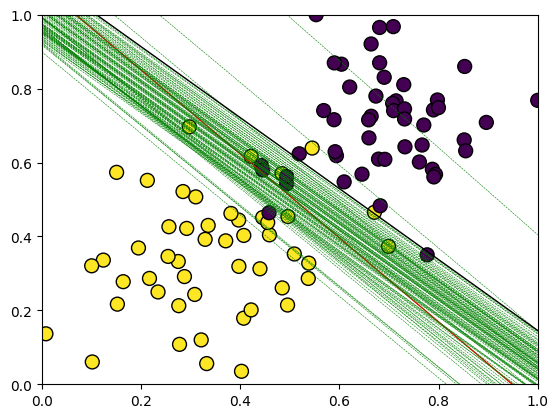

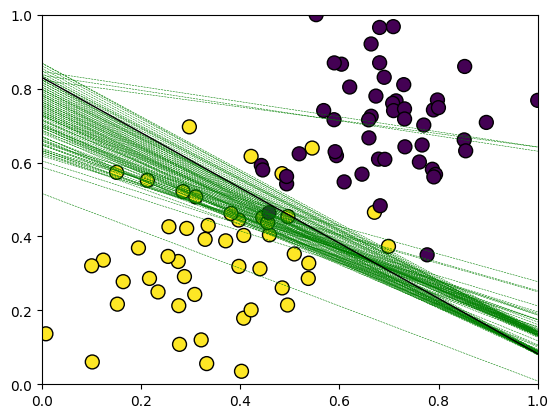

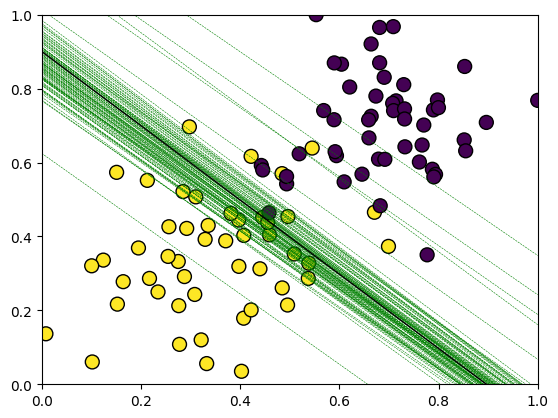

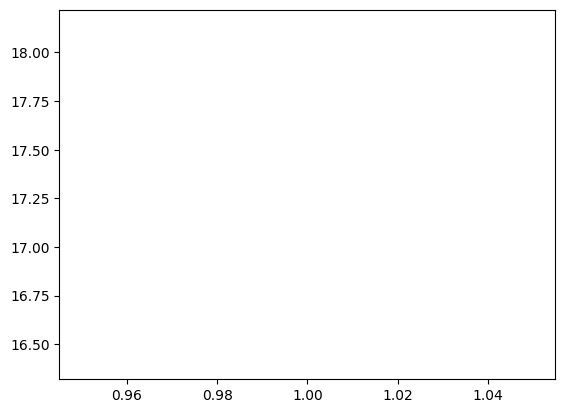

Epoch: 0, Error: 17.269787996170432


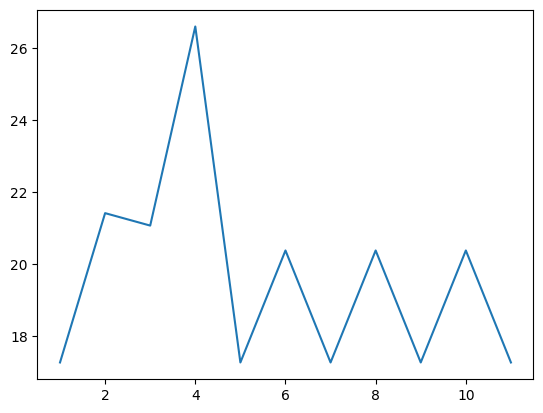

Epoch: 10, Error: 17.26938819745533


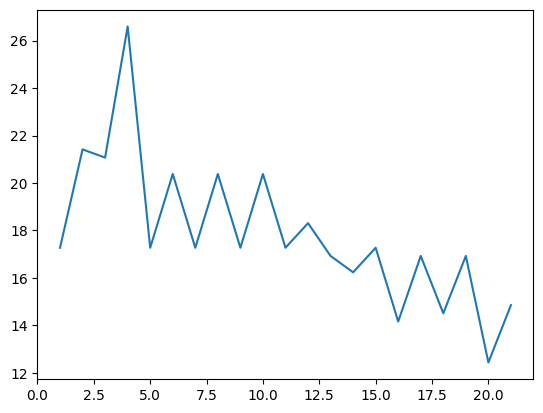

Epoch: 20, Error: 14.851673849811585


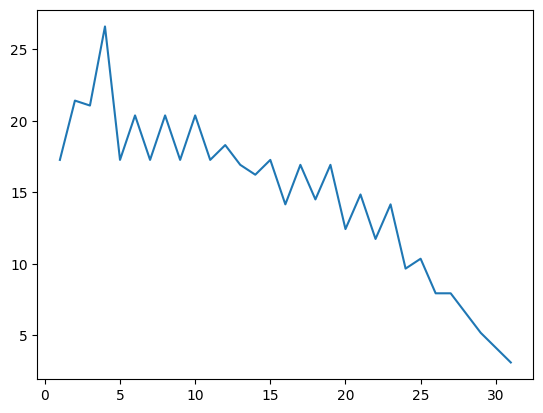

Epoch: 30, Error: 3.1085058674905657


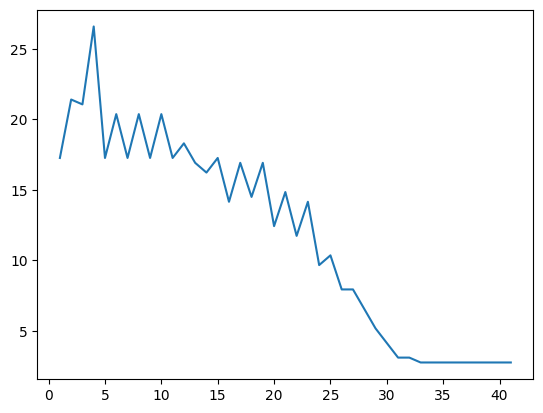

Epoch: 40, Error: 2.763134095490063


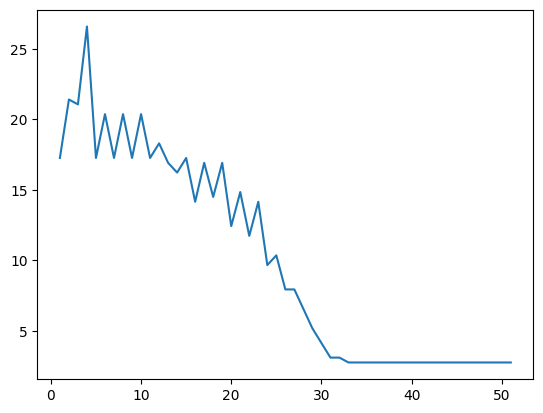

Epoch: 50, Error: 2.763134095490063


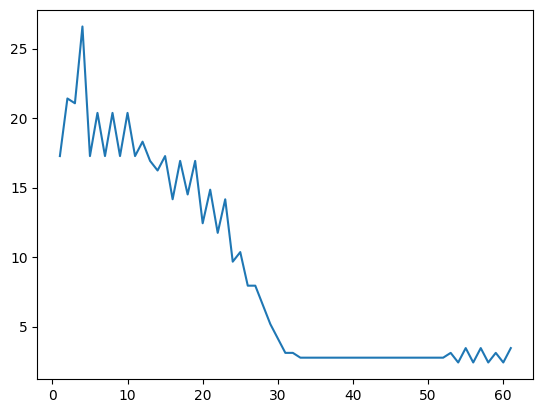

Epoch: 60, Error: 3.453933611311182


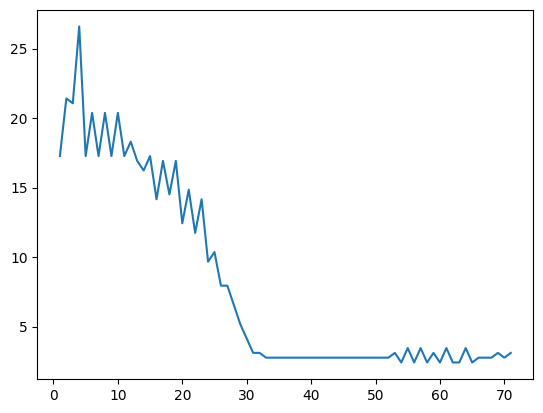

Epoch: 70, Error: 3.1085458473620755


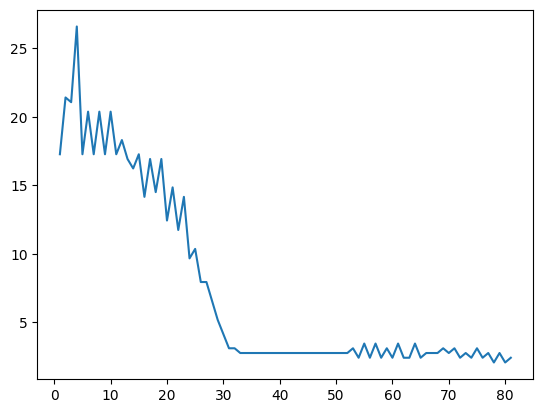

Epoch: 80, Error: 2.4177623234895598


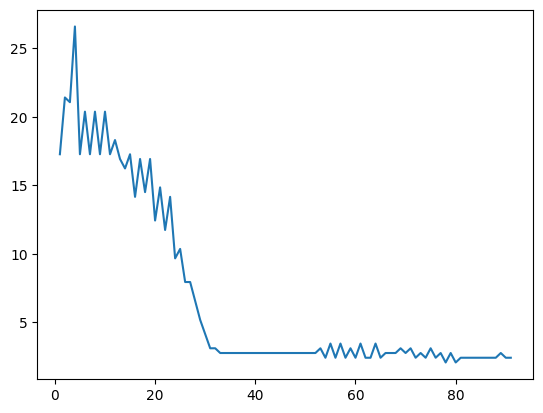

Epoch: 90, Error: 2.4177623234895598


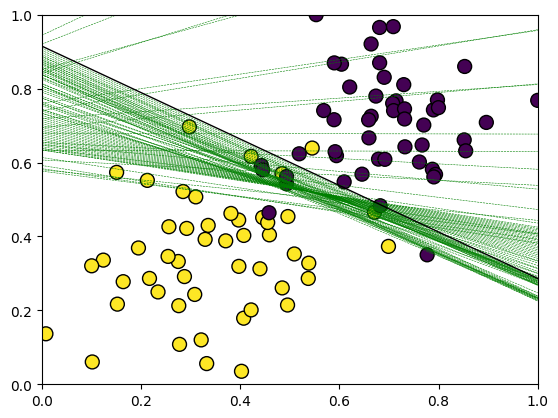

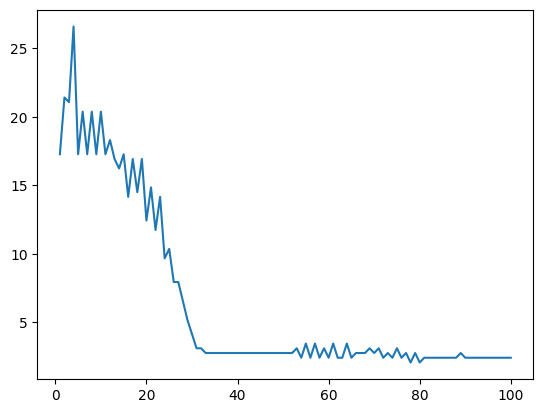

In [116]:
#import data and label
df = pd.read_csv('data.csv', header=None)
df.columns = ['x', 'y', 'set']
x = df[['x', 'y']].values
y = df['set'].values
#create 3 different Perceptrons with different LR to show affect of learning rate
h1Percep = Perceptron(inputs = 2, lr = 0.01, epochs = 100)
h2Percep = Perceptron(inputs = 2, lr = 0.1, epochs = 100)
h3Percep = Perceptron(inputs = 2, lr = 1, epochs = 100)
h1Percep.heuristic(x,y)
h2Percep.heuristic(x,y)
h3Percep.heuristic(x,y)
#gradient descent
gdPercep = Perceptron(inputs = 2, lr = 0.01, epochs = 100)
gdPercep.gradientDescent(x, y)